# Bucharest Data Analysis

## Importing Air Quality for Bucharest Romania

In [598]:
# importing pandas
import pandas as pd

# Loading Data as a Data Frame
file_path1 = 'combined_Bucharest_Data.csv'
BU = pd.read_csv(file_path1)

# Display the first few rows of the DataFrame
print(BU.head())

   location_id location_name parameter  value   unit  \
0      2163091           B-2      pm10   34.0  µg/m³   
1      2163091           B-2      pm10   32.0  µg/m³   
2      2163091           B-2      pm10   30.0  µg/m³   
3      2163091           B-2      pm10   34.0  µg/m³   
4      2163091           B-2      pm10   31.0  µg/m³   

                 datetimeUtc              datetimeLocal          timezone  \
0  2024-06-04T01:00:00+00:00  2024-06-04T04:00:00+03:00  Europe/Bucharest   
1  2024-06-04T02:00:00+00:00  2024-06-04T05:00:00+03:00  Europe/Bucharest   
2  2024-06-04T05:00:00+00:00  2024-06-04T08:00:00+03:00  Europe/Bucharest   
3  2024-06-04T06:00:00+00:00  2024-06-04T09:00:00+03:00  Europe/Bucharest   
4  2024-06-04T07:00:00+00:00  2024-06-04T10:00:00+03:00  Europe/Bucharest   

    latitude  longitude  country_iso  isMobile  isMonitor  \
0  44.417967  26.160786          NaN       NaN        NaN   
1  44.417967  26.160786          NaN       NaN        NaN   
2  44.417967  26.

## Cleaning the Data 

In [599]:
# Sorting time
BU['time_only'] = BU['datetimeLocal'].str[11:16]
BU['date_only'] = BU['datetimeLocal'].str[0:10]

# Subsetting With only Columns we need
BUClean = BU[['parameter','value','unit','time_only','date_only']]
BUClean

,parameter,value,unit,time_only,date_only
0,pm10,34.0,µg/m³,04:00,2024-06-04
1,pm10,32.0,µg/m³,05:00,2024-06-04
2,pm10,30.0,µg/m³,08:00,2024-06-04
3,pm10,34.0,µg/m³,09:00,2024-06-04
4,pm10,31.0,µg/m³,10:00,2024-06-04
...,...,...,...,...,...
8475,no2,20.0,µg/m³,22:00,2024-02-07
8476,no2,21.0,µg/m³,23:00,2024-02-07
8477,no2,18.0,µg/m³,00:00,2024-02-08
8478,no2,18.0,µg/m³,01:00,2024-02-08


## Subsetting and Grouping

In [600]:
# Using loc to create indexed subset
BUCleanI=BUClean.set_index(['time_only','parameter']).sort_index()
BUCleanI

value   unit   date_only
time_only parameter                           
00:00     co          980.0  µg/m³  2024-03-10
          co         1300.0  µg/m³  2024-03-11
          co          650.0  µg/m³  2024-02-10
          co         1200.0  µg/m³  2024-02-11
          co          500.0  µg/m³  2024-02-12
...                     ...    ...         ...
23:00     so2           5.9  µg/m³  2024-02-03
          so2           5.1  µg/m³  2024-02-04
          so2           6.3  µg/m³  2024-02-05
          so2           8.9  µg/m³  2024-02-06
          so2          11.0  µg/m³  2024-02-07

[8480 rows x 3 columns]

### Pivot Table of all pollutants

In [601]:
# Pivot Table
PivotBU = BUClean.pivot_table(values='value', index=['time_only', 'parameter'], columns='unit',fill_value=0)
PivotBU

unit                      µg/m³
time_only parameter            
00:00     co         827.567568
          no2         18.397222
          pm10        28.382569
          so2          5.102778
01:00     co         753.947368
...                         ...
22:00     so2          5.068807
23:00     co         853.947368
          no2         23.180952
          pm10        27.933019
          so2          5.069524

[96 rows x 1 columns]

# Pivot table of Individual Pollutants

In [602]:
# Pivot on Pullutants
PivotPolutant = BUClean.pivot_table(values='value', index=['parameter','time_only'], columns='unit',fill_value=0)
PivotPolutant

unit                      µg/m³
parameter time_only            
co        00:00      827.567568
          01:00      753.947368
          02:00      708.378378
          03:00      692.972973
          04:00      684.864865
...                         ...
so2       19:00        5.144792
          20:00        5.211881
          21:00        5.026471
          22:00        5.068807
          23:00        5.069524

[96 rows x 1 columns]

#### Subset of Co

In [603]:
# Subset rows where parameter is 'co'
CO_subset = PivotPolutant.xs('co', level='parameter')

# Display the subsetted DataFrame
print(CO_subset)

unit            µg/m³
time_only            
00:00      827.567568
01:00      753.947368
02:00      708.378378
03:00      692.972973
04:00      684.864865
05:00      680.810811
06:00      692.702703
07:00      725.945946
08:00      772.972973
09:00      754.324324
10:00      724.864865
11:00      686.486486
12:00      672.631579
13:00      648.157895
14:00      628.947368
15:00      618.918919
16:00      611.621622
17:00      615.405405
18:00      661.891892
19:00      718.378378
20:00      769.729730
21:00      820.263158
22:00      840.789474
23:00      853.947368


#### Subset of No2

In [604]:
No2_subset = PivotPolutant.xs('no2', level='parameter')
print(No2_subset)

unit           µg/m³
time_only           
00:00      18.397222
01:00      16.557273
02:00      14.669231
03:00      12.335652
04:00      11.742593
05:00      12.185417
06:00      12.334000
07:00      13.882883
08:00      17.828571
09:00      18.398058
10:00      18.054545
11:00      14.313725
12:00      12.135922
13:00       9.774510
14:00       8.536634
15:00       8.284762
16:00       8.152252
17:00       9.278095
18:00      12.533010
19:00      17.136082
20:00      19.011000
21:00      21.774257
22:00      21.954128
23:00      23.180952


#### Subset of pm10

In [605]:
Pm10_subset = PivotPolutant.xs('pm10', level='parameter')
print(Pm10_subset)

unit           µg/m³
time_only           
00:00      28.382569
01:00      26.085586
02:00      25.444762
03:00      24.483621
04:00      23.118349
05:00      24.791837
06:00      23.090196
07:00      23.255752
08:00      24.477358
09:00      25.265714
10:00      25.938739
11:00      23.374038
12:00      22.542991
13:00      21.176415
14:00      19.707767
15:00      18.994340
16:00      17.835398
17:00      18.423364
18:00      19.370476
19:00      20.428571
20:00      21.034314
21:00      23.602913
22:00      24.831818
23:00      27.933019


Subset of So2

In [606]:
So2_subset = PivotPolutant.xs('so2', level='parameter')
print(So2_subset)

unit          µg/m³
time_only          
00:00      5.102778
01:00      5.011818
02:00      4.986538
03:00      4.791304
04:00      4.806542
05:00      4.760417
06:00      4.662000
07:00      4.611607
08:00      4.458654
09:00      4.725243
10:00      4.949541
11:00      5.069307
12:00      5.161538
13:00      5.294231
14:00      5.351961
15:00      5.344231
16:00      5.281982
17:00      5.312264
18:00      5.152427
19:00      5.144792
20:00      5.211881
21:00      5.026471
22:00      5.068807
23:00      5.069524


# Graphs

## Dangerous Pollutant Level 

### Dangerous Index Levels
These are the levels of pollutants that would be an immediate public emergency

In [607]:
# Danger zones 
danger_zones = {
    'no2': 100,   
    'pm10': 150,  
    'so2': 500,   
    'co': 10000   
}


# WHO guideline levels
The WHO sets air quality index guidelines to protect public health. In the case of pm10;
- 24 hr guidelines recommend less than 50 micrograms per cubic meter
- mean annual guidelines recommend less than 20 micrograms per cubic meter

In [608]:
WHOLevel ={
    'Pm10': 50
}

### Graph of Co(Carbon Monoxide) Averaged over 24 hours

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1596225200.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO_subset['time_num'] = CO_subset['time_only'].apply(time_to_hours)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1596225200.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO_subset['µg/m³_pred'] = model.predict(X)


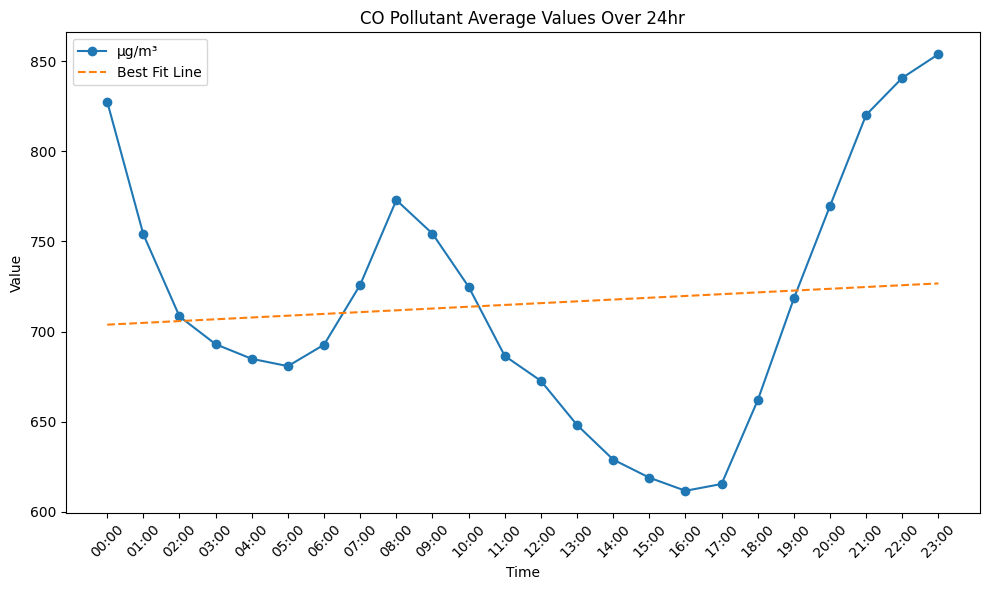

In [609]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

CO_subset.reset_index(inplace=True)

def time_to_hours(time_str):
    h, m = map(int, time_str.split(':'))
    return h + m / 60
if 'time_only' in CO_subset.columns:
    CO_subset['time_num'] = CO_subset['time_only'].apply(time_to_hours)
else:
    raise KeyError("Column 'time_only' is not present in the DataFrame.")

X = CO_subset[['time_num']]
y = CO_subset['µg/m³']
model = LinearRegression()
model.fit(X, y)
CO_subset['µg/m³_pred'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(CO_subset['time_only'], CO_subset['µg/m³'], label='µg/m³', marker='o')
plt.plot(CO_subset['time_only'], CO_subset['µg/m³_pred'], label='Best Fit Line', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('CO Pollutant Average Values Over 24hr')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Carbon Monoxide (CO)
- Carbon monoxide (CO) is a colorless, odorless gas composed of one carbon atom and one oxygen atom. It is a significant air pollutant primarily found in the troposphere.
- CO is primarily emitted from incomplete combustion of fossil fuels and biomass. It is a byproduct of vehicle emissions, industrial processes, residential heating, and wildfires. Natural sources include volcanic eruptions and methane oxidation in the atmosphere.
- High levels of CO can be harmful to human health, as it binds to hemoglobin in red blood cells, reducing their ability to carry oxygen. This can lead to symptoms such as headaches, dizziness, nausea, and in severe cases, can be fatal.
- CO also contributes to the formation of ground-level ozone and particulate matter, further exacerbating air quality issues. It is regulated globally to reduce its impact on public health and the environment.
### Looking at the Data
- The CO pollutant levels in µg/m³ show significant fluctuation throughout the 24-hour period.
- There is a noticeable decrease in CO levels from midnight until around 5:00 AM, reaching a minimum just below 600 µg/m³.
- CO levels then increase sharply, peaking around 8:00 AM at approximately 825 µg/m³.
- A gradual decline follows, with another minimum observed around 4:00 PM.
- The levels rise again towards the end of the day, reaching just above 850 µg/m³ by midnight.
### Likely Causes
- Diurnal Patterns:
    - The observed fluctuations may correspond to typical daily activities. For instance, the peak around 8:00 AM could be due to morning rush hour traffic, which increases CO emissions.
- Early morning and late evening peaks might be influenced by temperature inversions that trap pollutants near the surface.
- Changes in wind speed and direction throughout the day can impact pollutant dispersion. Reduced wind speeds at night may lead to higher pollutant concentrations.
- The pattern might also reflect periods of high human activity, such as commuting times and industrial operations, which contribute to higher CO emissions.

### Graph of No2(Nitrogen Dioxide) Averaged over 24 hours

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/4228334655.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No2_subset['time_num'] = No2_subset['time_only'].apply(time_to_hours)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/4228334655.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  No2_subset['µg/m³_pred'] = model.predict(X)


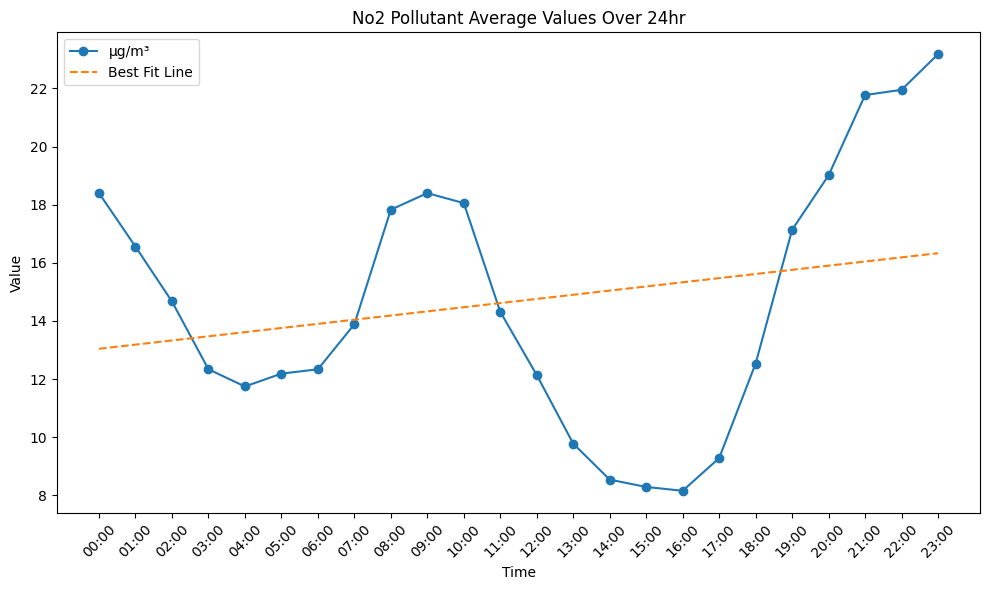

In [610]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

No2_subset.reset_index(inplace=True)

def time_to_hours(time_str):
    h, m = map(int, time_str.split(':'))
    return h + m / 60

if 'time_only' in No2_subset.columns:
    No2_subset['time_num'] = No2_subset['time_only'].apply(time_to_hours)
else:
    raise KeyError("Column 'time_only' is not present in the DataFrame.")

X = No2_subset[['time_num']]
y = No2_subset['µg/m³']

model = LinearRegression()
model.fit(X, y)
No2_subset['µg/m³_pred'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(No2_subset['time_only'], No2_subset['µg/m³'], label='µg/m³', marker='o')
plt.plot(No2_subset['time_only'], No2_subset['µg/m³_pred'], label='Best Fit Line', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('No2 Pollutant Average Values Over 24hr')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Nitrogen Dioxide (NO2)
- Nitrogen dioxide (NO2) is a reddish-brown gas composed of one nitrogen atom and two oxygen atoms. It is a significant air pollutant primarily found in the troposphere.
- Sources:
    - NO2 is primarily emitted from combustion processes, particularly from vehicles, power plants, industrial facilities, and residential heating. It is also produced naturally by lightning and microbial activity in soils.
- Health Impacts:
    - Exposure to high levels of NO2 can irritate the respiratory system, exacerbate asthma, and reduce lung function. Prolonged exposure may increase the risk of respiratory infections and other respiratory diseases.
- NO2 contributes to the formation of ground-level ozone and fine particulate matter (PM2.5), which are harmful to human health and the environment. It reacts with volatile organic compounds (VOCs) in the presence of sunlight to form ozone, a major component of smog.
### Looking at the Data
- The NO2 pollutant levels in µg/m³ exhibit noticeable variation throughout the 24-hour period.
- Starting at around 18 µg/m³ at midnight, the levels decrease steadily, reaching a minimum of about 11 µg/m³ around 5:00 AM.
- A sharp increase follows, peaking at approximately 18 µg/m³ around 10:00 AM.
- The levels then decline gradually, hitting another minimum of about 9 µg/m³ around 4:00 PM.
- A significant rise is observed again in the evening, with levels climbing to around 22 µg/m³ by midnight.
### Likely Causes
- The morning peak around 10:00 AM might be associated with increased vehicle emissions during morning rush hour.
- The early morning and late evening peaks could be influenced by temperature inversions that trap pollutants near the surface, preventing dispersion.
- Variations in wind speed and direction can affect pollutant dispersion. Lower wind speeds at night may contribute to higher pollutant concentrations.
- The pattern may also reflect periods of high human activity, such as commuting times and industrial operations, which lead to increased NO2 emissions.

### Graph of Pm10 Averaged over 24 hours

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/3032795434.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pm10_subset['time_num'] = Pm10_subset['time_only'].apply(time_to_hours)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/3032795434.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pm10_subset['µg/m³_pred'] = model.predict(X)


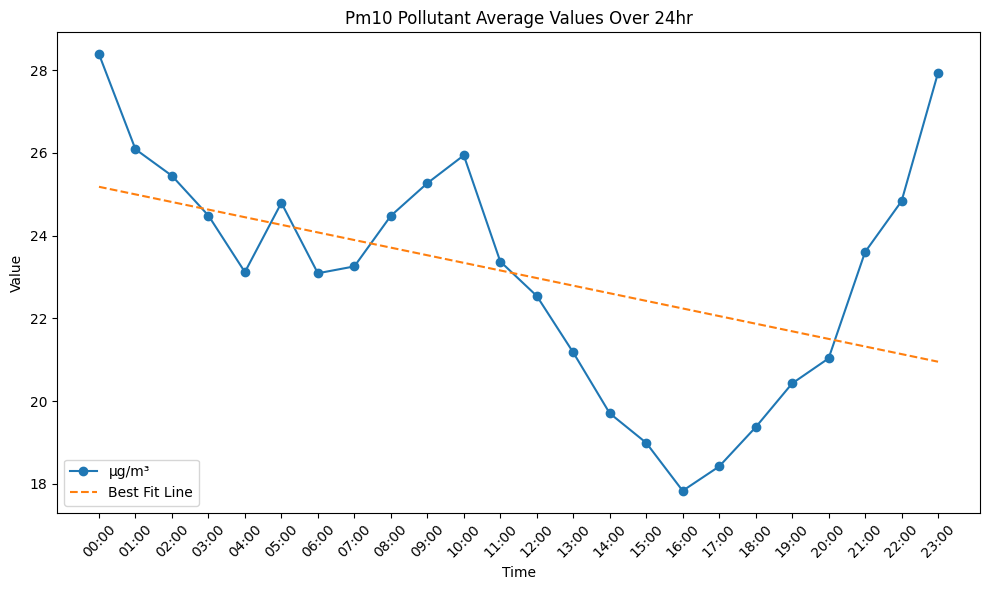

In [611]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Pm10_subset.reset_index(inplace=True)

def time_to_hours(time_str):
    h, m = map(int, time_str.split(':'))
    return h + m / 60

if 'time_only' in Pm10_subset.columns:
    Pm10_subset['time_num'] = Pm10_subset['time_only'].apply(time_to_hours)
else:
    raise KeyError("Column 'time_only' is not present in the DataFrame.")

X = Pm10_subset[['time_num']]
y = Pm10_subset['µg/m³']

model = LinearRegression()
model.fit(X, y)
Pm10_subset['µg/m³_pred'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(Pm10_subset['time_only'], Pm10_subset['µg/m³'], label='µg/m³', marker='o')
plt.plot(Pm10_subset['time_only'], Pm10_subset['µg/m³_pred'], label='Best Fit Line', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Pm10 Pollutant Average Values Over 24hr')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## PM10 (Particulate Matter ≤ 10 micrometers)
- PM10 refers to particulate matter that is 10 micrometers or smaller in diameter. It includes particles such as dust, pollen, mold, and other fine particles suspended in the air.
- Sources:
    - PM10 particles originate from sources such as dust storms, industrial processes, vehicle emissions, construction activities, and agricultural activities.
- Health Impacts:
    - These particles can be inhaled into the respiratory system, leading to health issues, especially when present in high concentrations over extended periods. PM10 exposure is associated with respiratory and cardiovascular problems, including aggravated asthma, decreased lung function, and increased hospital admissions for respiratory and cardiovascular diseases.
- PM10 contributes to reduced visibility (haze) and can deposit in the lungs when inhaled, potentially causing respiratory problems. It can also affect ecosystems and soil productivity when deposited.
### Looking at the Data
- The PM10 pollutant levels in µg/m³ show noticeable variation throughout the 24-hour period.
- The levels start at around 28 µg/m³ at midnight and decrease steadily until reaching a minimum of about 22 µg/m³ around 4:00 AM.
- A period of fluctuations follows, with levels peaking again at around 27 µg/m³ around 10:00 AM.
- There is a gradual decline, reaching another minimum of about 18 µg/m³ around 4:00 PM.
- The levels then rise again towards the end of the day, peaking at around 28 µg/m³ by midnight.
### Likely Causes
- The morning peak around 10:00 AM could be associated with increased vehicle and industrial emissions during this period.
- The early morning and late evening peaks might be influenced by temperature inversions that trap pollutants close to the ground.
- Changes in wind speed and direction throughout the day can impact the dispersion of particulate matter. Lower wind speeds at night may lead to higher concentrations.
- The pattern may reflect periods of high human activity, such as commuting times and industrial operations, which contribute to higher PM10 emissions.

### Graph of So2(Sulphur Dioxide) Averaged over 24 hours

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1617689235.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  So2_subset['time_num'] = So2_subset['time_only'].apply(time_to_hours)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1617689235.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  So2_subset['µg/m³_pred'] = model.predict(X)


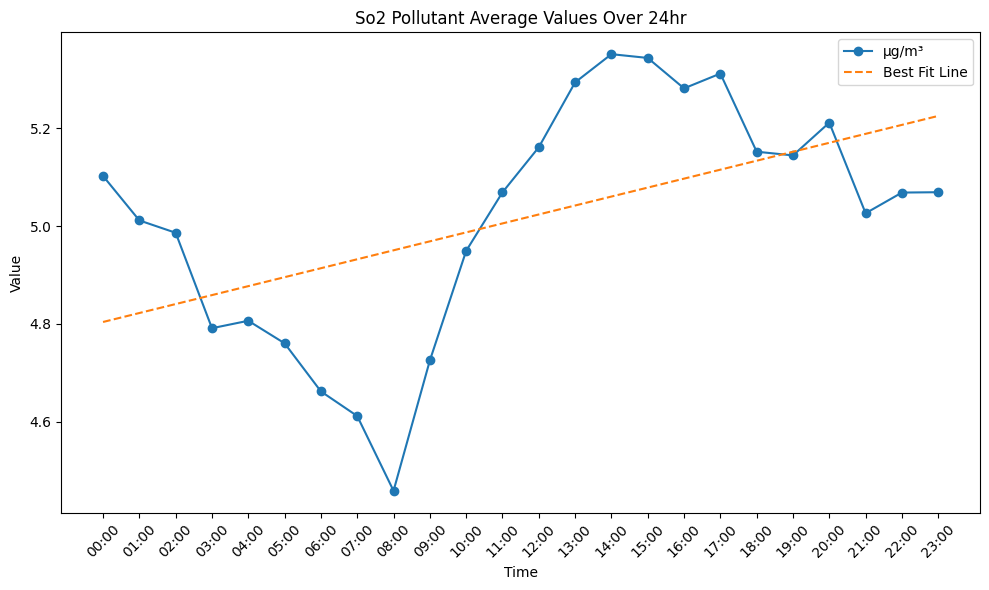

In [612]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

So2_subset.reset_index(inplace=True)

def time_to_hours(time_str):
    h, m = map(int, time_str.split(':'))
    return h + m / 60

if 'time_only' in So2_subset.columns:
    So2_subset['time_num'] = So2_subset['time_only'].apply(time_to_hours)
else:
    raise KeyError("Column 'time_only' is not present in the DataFrame.")

X = So2_subset[['time_num']]
y = So2_subset['µg/m³']

model = LinearRegression()
model.fit(X, y)
So2_subset['µg/m³_pred'] = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(So2_subset['time_only'], So2_subset['µg/m³'], label='µg/m³', marker='o')
plt.plot(So2_subset['time_only'], So2_subset['µg/m³_pred'], label='Best Fit Line', linestyle='--')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('So2 Pollutant Average Values Over 24hr')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Sulfur Dioxide (SO2)
- Sulfur dioxide (SO2) is a colorless gas composed of one sulfur atom and two oxygen atoms. It is a significant air pollutant primarily found in the troposphere.
- Sources:
    - SO2 is emitted from both natural and anthropogenic sources. Natural sources include volcanic eruptions, while anthropogenic sources include combustion of fossil fuels (e.g., from power plants and vehicles), industrial processes (e.g., metal smelting), and residential heating.
- Health Impacts:
    - Inhalation of SO2 can irritate the respiratory system, aggravate existing respiratory diseases (such as asthma and bronchitis), and impair lung function. Prolonged exposure to high levels of SO2 can lead to chronic respiratory problems.
- SO2 contributes to the formation of acid rain when it reacts with water vapor in the atmosphere. Acid rain can harm aquatic ecosystems, damage vegetation, and corrode buildings and infrastructure.
### Looking at the Data
- The SO2 pollutant levels in µg/m³ show some variation throughout the 24-hour period.
- The levels start at around 5.2 µg/m³ at midnight and decrease steadily until reaching a minimum of about 4.5 µg/m³ around 8:00 AM.
- There is a steady increase following the morning minimum, with levels peaking at around 5.3 µg/m³ around 3:00 PM.
- A period of minor fluctuations follows, with levels staying between 5.1 and 5.3 µg/m³ for the rest of the day.
### Likely Causes
- The observed fluctuations may be linked to daily human activities. The afternoon peak around 3:00 PM could be associated with increased vehicle emissions and industrial activities during this period.
- The early morning minimum might be influenced by temperature inversions that trap pollutants close to the ground, while the breakdown of inversions in the afternoon can lead to increased dispersion and higher recorded levels.
- Changes in wind speed and direction throughout the day can impact the dispersion of sulfur dioxide. Higher wind speeds in the afternoon may disperse pollutants more effectively, while lower speeds at night can result in higher concentrations.
- The pattern may reflect periods of high human activity, such as commuting times and industrial operations, which contribute to higher SO2 emissions.

# Trend over Time

In [613]:
# Pivot Table
TrendBU = BUClean.pivot_table(values='value', index=['parameter', 'date_only'], columns='unit',fill_value=0)
TrendBU

unit                        µg/m³
parameter date_only              
co        2024-01-29   563.913043
          2024-01-30   589.166667
          2024-01-31   631.666667
          2024-02-01  1054.000000
          2024-02-02   848.333333
...                           ...
so2       2024-06-28     6.940000
          2024-06-29     6.012500
          2024-06-30     5.825000
          2024-07-01     6.020000
          2024-07-02     5.650000

[473 rows x 1 columns]

### subsets

In [614]:
# subsets
pm10Trend = TrendBU.xs('pm10', level='parameter')
print(pm10Trend)

no2Trend = TrendBU.xs('no2', level='parameter')
print(no2Trend)

coTrend = TrendBU.xs('co', level='parameter')
print(coTrend)

so2Trend = TrendBU.xs('so2', level='parameter')
print(so2Trend)
so2Trend.columns

unit            µg/m³
date_only            
2024-01-29  13.891304
2024-01-30  18.900000
2024-01-31  20.875000
2024-02-01  51.400000
2024-02-02  41.500000
...               ...
2024-06-28  28.800000
2024-06-29  24.833333
2024-06-30  24.791667
2024-07-01  25.400000
2024-07-02  21.750000

[144 rows x 1 columns]
unit            µg/m³
date_only            
2024-01-29  33.045455
2024-01-30  34.652174
2024-01-31  34.478261
2024-02-01  75.400000
2024-02-02  52.391304
...               ...
2024-06-28  -1.000000
2024-06-29  -1.000000
2024-06-30  -1.000000
2024-07-01  -1.000000
2024-07-02  -1.000000

[144 rows x 1 columns]
unit              µg/m³
date_only              
2024-01-29   563.913043
2024-01-30   589.166667
2024-01-31   631.666667
2024-02-01  1054.000000
2024-02-02   848.333333
2024-02-03   664.166667
2024-02-04   651.666667
2024-02-05   504.166667
2024-02-06   524.583333
2024-02-07   565.000000
2024-02-08   530.000000
2024-02-09   615.714286
2024-02-10   737.916667
2024-02-11   630.833

Index(['µg/m³'], dtype='object', name='unit')

## Trend Over Time for so2

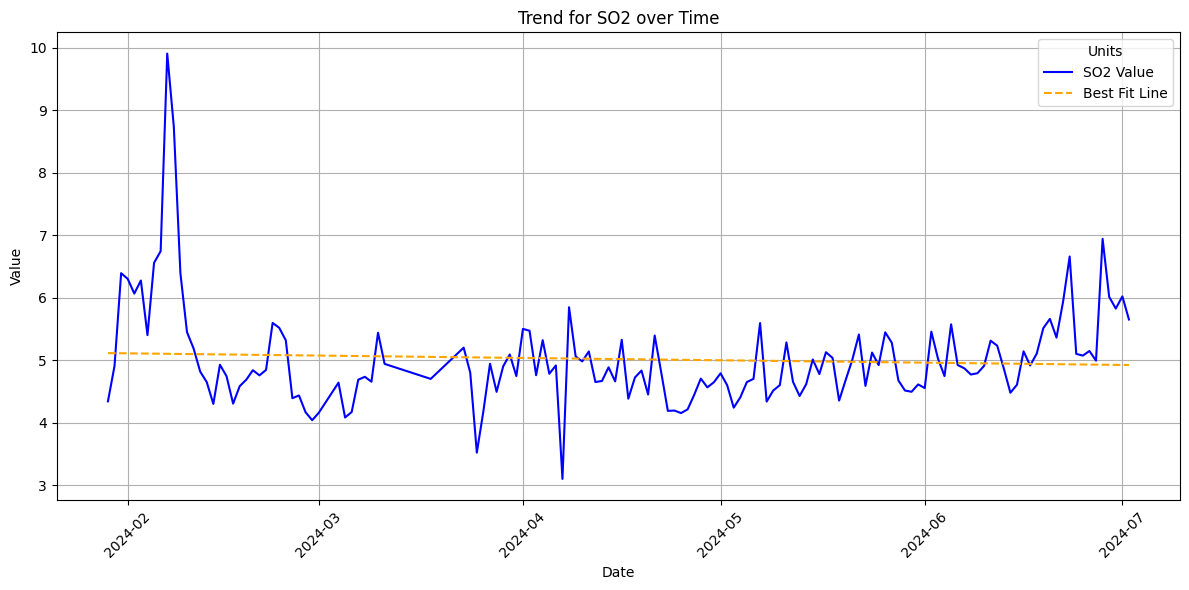

In [615]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

so2Trend = so2Trend.reset_index()
so2Trend['date_only'] = pd.to_datetime(so2Trend['date_only'])
so2Trend['date_ordinal'] = so2Trend['date_only'].map(pd.Timestamp.toordinal)
target_column = 'µg/m³'  
X = so2Trend[['date_ordinal']]
y = so2Trend[target_column]

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
so2Trend['value_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(so2Trend['date_only'], so2Trend[target_column], label='SO2 Value', color='blue')
plt.plot(so2Trend['date_only'], so2Trend['value_pred'], label='Best Fit Line', color='orange', linestyle='--')
plt.title('Trend for SO2 over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Units')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


# Sulfur Dioxide (SO2)

- **SO2** refers to a gas produced from burning fossil fuels, industrial processes, and volcanic activity. It can contribute to air pollution and health issues.

### Data Trends

- The graph displays the trend for SO2 levels in µg/m³ over time.
- Key observations:
    - SO2 levels exhibit fluctuations during the observed period.
    - Peaks occur on specific dates, surpassing recommended thresholds.
    - Notable peak dates include:
        - January 29th
        - February 18th
        - March 11th
        - April 10th
        - April 30th
        - May 20th
        - June 9th
        - June 29th

### Likely Causes

1. **Combustion Processes**:
   - Burning of fossil fuels (coal, oil, gas) releases SO2.
   - Peaks may coincide with increased energy consumption.

2. **Industrial Emissions**:
   - Factories and power plants emit SO2.
   - Peaks might align with specific industrial activities.

3. **Volcanic Activity**:
   - Volcanoes release SO2 during eruptions.
   - Peaks could correspond to volcanic events.

4. **Weather Conditions**:
   - Wind patterns affect SO2 dispersion.
   - Temperature inversions trap pollutants.

### Health Implications

- SO2 exposure can harm respiratory health.




## Trend Over Time for Pm10

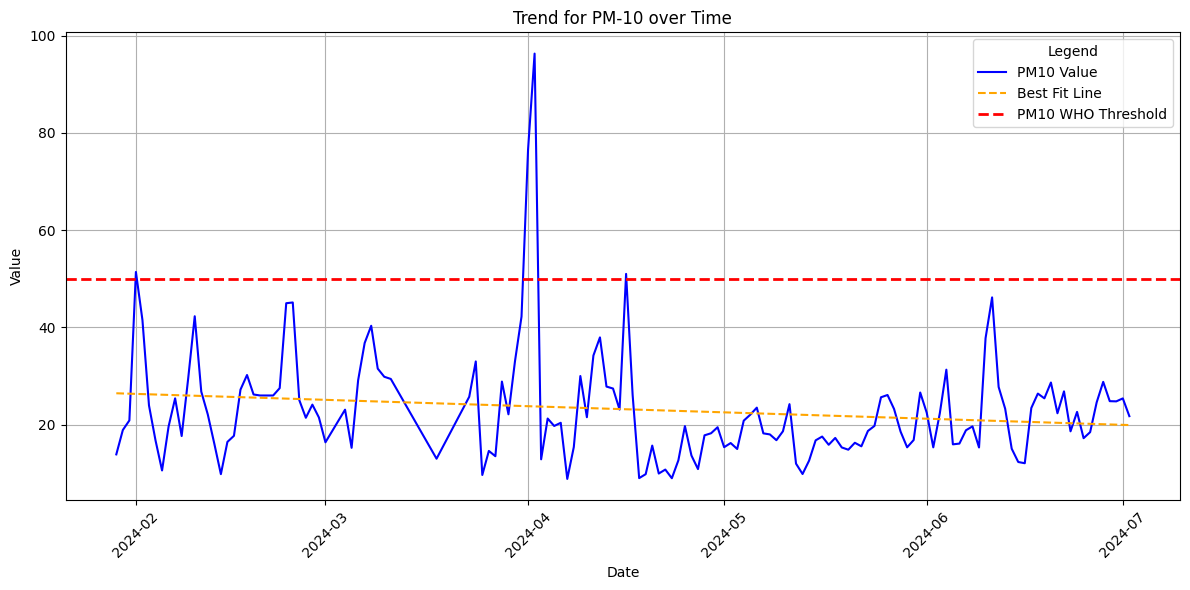

In [616]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

pm10Trend = pm10Trend.reset_index()
pm10Trend['date_only'] = pd.to_datetime(pm10Trend['date_only'])
pm10Trend['date_ordinal'] = pm10Trend['date_only'].map(pd.Timestamp.toordinal)

target_column = 'µg/m³'

X = pm10Trend[['date_ordinal']]
y = pm10Trend[target_column]

model = LinearRegression()
model.fit(X, y)
pm10Trend['value_pred'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(pm10Trend['date_only'], pm10Trend[target_column], label='PM10 Value', color='blue')
plt.plot(pm10Trend['date_only'], pm10Trend['value_pred'], label='Best Fit Line', color='orange', linestyle='--')
plt.axhline(y=WHOLevel['Pm10'], color='red', linestyle='--', linewidth=2, label='PM10 WHO Threshold')
plt.title('Trend for PM-10 over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Legend')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Particulate Matter (PM10)

- **PM10** refers to airborne particles with a diameter of 10 micrometers or less. These particles can come from various sources, including vehicle emissions, industrial processes, and natural events.

### Data Trends

- The graph shows the trend for PM10 levels in µg/m³ over time.
- Key observations:
    - The PM10 levels exhibit fluctuations throughout the observed period.
    - Peaks occur at specific dates, exceeding the World Health Organization (WHO) threshold of 50 µg/m³.
    - Notable peak dates include:
        - January 29th
        - February 18th
        - March 11th
        - April 10th
        - April 30th
        - May 20th
        - June 9th
        - June 29th

### Likely Causes

1. **Traffic Emissions**:
   - Rush hours and increased vehicular activity contribute to elevated PM10 levels.
   - Peaks might align with heavy traffic days.

2. **Industrial Activities**:
   - Industrial processes release particulate matter.
   - Peaks could correspond to specific industrial operations.

3. **Weather Conditions**:
   - Temperature inversions trap pollutants near the ground.
   - Wind patterns affect dispersion.

4. **Seasonal Variations**:
   - Lower heating needs in warmer months lead to decreased PM10 levels.

### Health Implications

- Chronic exposure to PM10 can harm respiratory health.
- Monitoring and mitigation efforts are crucial to maintain air quality.


## Trend Over Time for no2

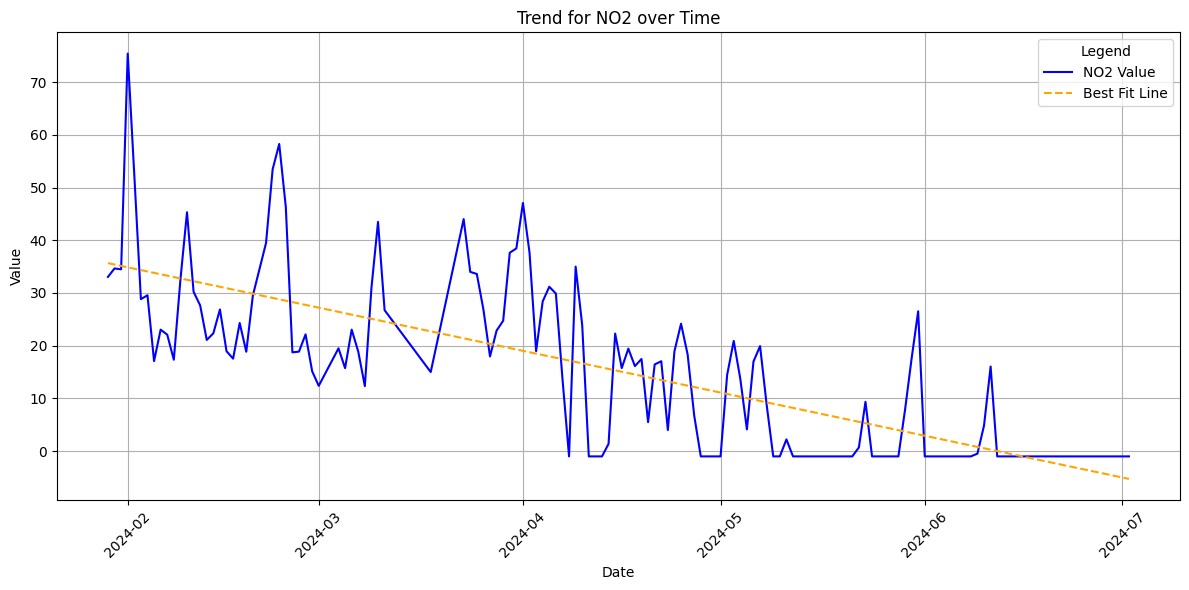

In [617]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

no2Trend = no2Trend.reset_index()
no2Trend['date_only'] = pd.to_datetime(no2Trend['date_only'])
no2Trend['date_ordinal'] = no2Trend['date_only'].map(pd.Timestamp.toordinal)
target_column = 'µg/m³'  

# Regression
X = no2Trend[['date_ordinal']]
y = no2Trend[target_column]
model = LinearRegression()
model.fit(X, y)
no2Trend['value_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(no2Trend['date_only'], no2Trend[target_column], label='NO2 Value', color='blue')
plt.plot(no2Trend['date_only'], no2Trend['value_pred'], label='Best Fit Line', color='orange', linestyle='--')
plt.title('Trend for NO2 over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Legend')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()




## Nitrogen Dioxide (NO2)
- **Nitrogen dioxide (NO2)** is a reddish-brown gas with a characteristic sharp, biting odor. It is one of a group of gases known as nitrogen oxides (NOx), which are significant air pollutants found primarily in the troposphere.
- **Sources**:
    - NO2 is emitted from both natural and anthropogenic sources. Natural sources include lightning and microbial activity in soils, while anthropogenic sources include combustion of fossil fuels (e.g., from vehicles, power plants, and industrial processes).
- **Health Impacts**:
    - Inhalation of NO2 can irritate the respiratory system, aggravate existing respiratory diseases (such as asthma), and reduce lung function. Long-term exposure can lead to chronic respiratory problems and increase susceptibility to respiratory infections.
    - NO2 is also a precursor to ozone and fine particulate matter (PM2.5), both of which have significant health impacts.

### Looking at the Data
- The NO2 pollutant levels in µg/m³ show a clear decreasing trend over the observed period.
- The levels start at around 70 µg/m³ in late January and exhibit a general decline towards June, with some notable peaks and troughs along the way.
- Significant peaks occur around January 29th, February 2nd, and March 6th, with levels reaching close to or above 70 µg/m³.
- There are several periods of relatively lower levels, particularly after mid-March, with levels frequently dropping to near 0 µg/m³ by June.

### Likely Causes
- The observed fluctuations in NO2 levels are likely influenced by daily human activities and environmental factors:
    - **Traffic Patterns**: High NO2 levels can be associated with rush hours when vehicle emissions are highest. The peaks could correspond to periods of heavy traffic.
    - **Industrial Activities**: Peaks in NO2 levels might coincide with specific industrial operations or increased energy consumption in Bucharest.
    - **Weather Conditions**: Temperature inversions, where a layer of warm air traps pollutants near the ground, can lead to elevated NO2 levels. Wind patterns also play a role in dispersing pollutants.
    - **Seasonal Variations**: The overall decrease in NO2 levels towards summer might be influenced by seasonal factors, such as reduced heating needs and increased dispersion due to higher temperatures and wind speeds.


## Trend Over Time for co

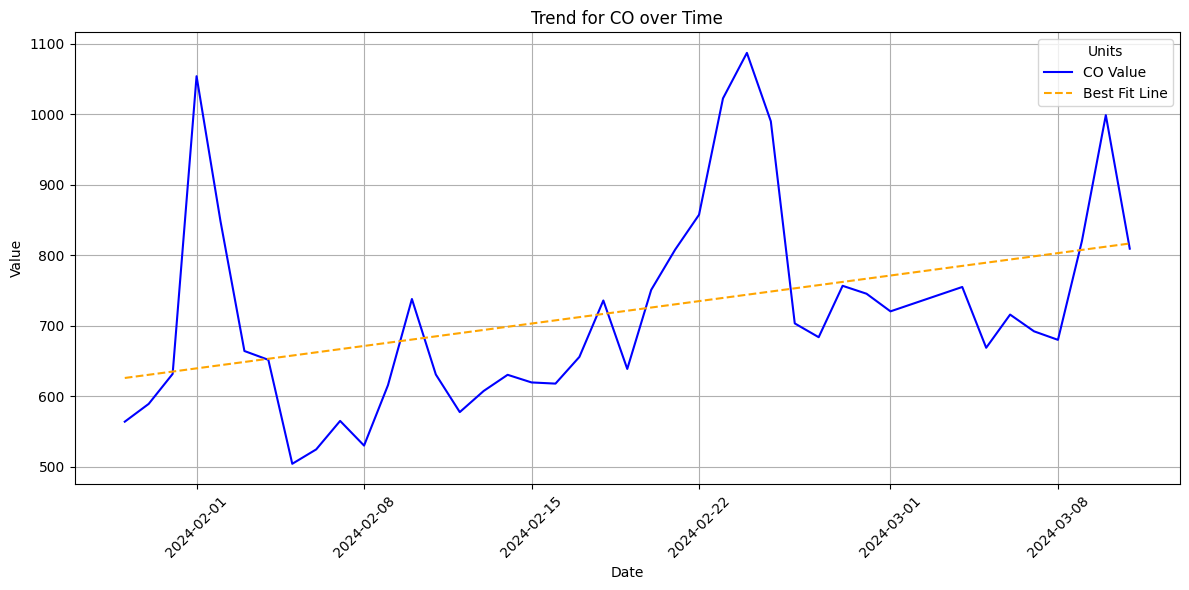

In [618]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

coTrend = coTrend.reset_index()
coTrend['date_only'] = pd.to_datetime(coTrend['date_only'])
coTrend['date_ordinal'] = coTrend['date_only'].map(pd.Timestamp.toordinal)

target_column = 'µg/m³'

X = coTrend[['date_ordinal']]
y = coTrend[target_column]

model = LinearRegression()
model.fit(X, y)
coTrend['value_pred'] = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(coTrend['date_only'], coTrend[target_column], label='CO Value', color='blue')
plt.plot(coTrend['date_only'], coTrend['value_pred'], label='Best Fit Line', color='orange', linestyle='--')
plt.title('Trend for CO over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Units')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


## Carbon Monoxide (CO)
- **Carbon monoxide (CO)** is a colorless, odorless gas composed of one carbon atom and one oxygen atom. It is a significant air pollutant found primarily in the troposphere.
- **Sources**:
    - CO is emitted from both natural and anthropogenic sources. Natural sources include wildfires and volcanic activity, while anthropogenic sources include incomplete combustion of fossil fuels (e.g., from vehicles, industrial processes, and residential heating).
- **Health Impacts**:
    - Inhalation of CO can be harmful as it binds with hemoglobin in the blood, reducing the blood's ability to carry oxygen. This can lead to symptoms such as headaches, dizziness, and in high concentrations, can be fatal. Long-term exposure to low levels can affect cardiovascular health.

### Looking at the Data
- The CO pollutant levels in µg/m³ show considerable variation over the observed period.
- The levels start below 700 µg/m³ in late January and exhibit significant spikes and drops throughout February and early March.
- Notable peaks occur around February 2nd and March 6th, with levels reaching close to or above 1000 µg/m³.
- There are several periods of relatively lower levels, particularly between February 3rd and February 7th, and between February 23rd and March 1st.

### Likely Causes
- The observed fluctuations in CO levels are likely influenced by daily human activities and environmental factors:
    - **Traffic Patterns**: High CO levels can be associated with rush hours when vehicle emissions are highest. The peaks could correspond to periods of heavy traffic.
    - **Industrial Activities**: Peaks in CO levels might coincide with specific industrial operations or increased energy consumption in Bucharest.
    - **Weather Conditions**: Temperature inversions, where a layer of warm air traps pollutants near the ground, can lead to elevated CO levels. Wind patterns also play a role in dispersing pollutants.
    - **Heating**: Residential heating, particularly during colder periods, can contribute to increased CO emissions from burning fuels.


# Air Quality Index AQI

In [619]:
import pandas as pd

# Function to calculate AQI for PM10
def calculate_aqi_pm10(value):
    if value <= 54:
        return (value / 54) * 50
    elif value <= 154:
        return ((value - 55) / (154 - 55)) * (100 - 51) + 51
    else:
        return None

# Making a copy for BU2
BU2 = BUClean.copy()

# Filtering BU2 to include only rows where parameter is 'pm10'
BU2_pm10 = BU2[BU2['parameter'] == 'pm10'].copy()

# Applying the AQI calculation for PM10 using .loc
BU2_pm10.loc[:, 'AQI'] = BU2_pm10['value'].apply(calculate_aqi_pm10)

print(BU2_pm10)


     parameter  value   unit time_only   date_only        AQI
0         pm10   34.0  µg/m³     04:00  2024-06-04  31.481481
1         pm10   32.0  µg/m³     05:00  2024-06-04  29.629630
2         pm10   30.0  µg/m³     08:00  2024-06-04  27.777778
3         pm10   34.0  µg/m³     09:00  2024-06-04  31.481481
4         pm10   31.0  µg/m³     10:00  2024-06-04  28.703704
...        ...    ...    ...       ...         ...        ...
7824      pm10   19.0  µg/m³     22:00  2024-02-07  17.592593
7825      pm10   19.0  µg/m³     23:00  2024-02-07  17.592593
7826      pm10   18.0  µg/m³     00:00  2024-02-08  16.666667
7827      pm10   18.0  µg/m³     01:00  2024-02-08  16.666667
7828      pm10   17.0  µg/m³     02:00  2024-02-08  15.740741

[2555 rows x 6 columns]


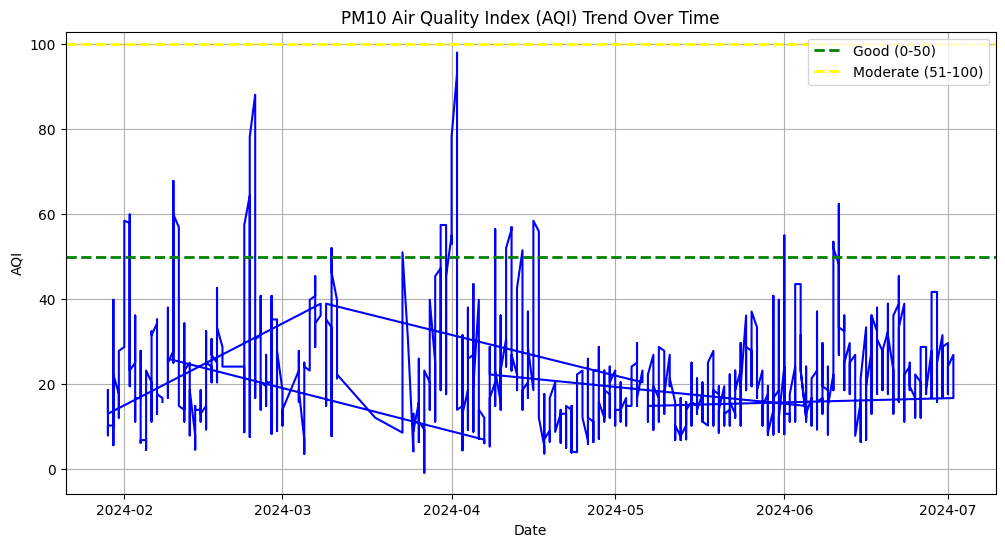

In [620]:
import pandas as pd
import matplotlib.pyplot as plt

BU2_pm10.loc[:, 'date_only'] = pd.to_datetime(BU2_pm10['date_only'])

# Plotting the AQI trend over time for PM10
plt.figure(figsize=(12, 6))
plt.plot(BU2_pm10['date_only'], BU2_pm10['AQI'], marker='', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('PM10 Air Quality Index (AQI) Trend Over Time')
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', linewidth=2, label='Moderate (51-100)')
plt.legend()
plt.grid(True)
plt.show()


## PM10 (Particulate Matter ≤ 10 micrometers)
- PM10 refers to particulate matter that is 10 micrometers or smaller in diameter. It includes particles such as dust, pollen, mold, and other fine particles suspended in the air.
- Sources:
    - PM10 particles originate from sources such as dust storms, industrial processes, vehicle emissions, construction activities, and agricultural activities.
- Health Impacts:
    - These particles can be inhaled into the respiratory system, leading to health issues, especially when present in high concentrations over extended periods. PM10 exposure is associated with respiratory and cardiovascular problems, including aggravated asthma, decreased lung function, and increased hospital admissions for respiratory and cardiovascular diseases.
- PM10 contributes to reduced visibility (haze) and can deposit in the lungs when inhaled, potentially causing respiratory problems. It can also affect ecosystems and soil productivity when deposited.

### Looking at the Data
- The PM10 AQI values show noticeable variation throughout the period from early 2024 to mid-2024.
- The AQI values fluctuate considerably, with several peaks reaching close to 100, indicating higher levels of pollution during those times.
- Most AQI values remain below 50, indicating generally good air quality for PM10.
- Occasional spikes above 50 enter the moderate range, and a few instances approach or slightly exceed 100.

### Likely Causes
- The peaks in AQI values around March and June may be associated with increased vehicle and industrial emissions during those periods.
- Seasonal events or specific local events could also contribute to the higher PM10 levels observed.
- Changes in weather patterns, such as temperature inversions, can trap pollutants close to the ground, leading to higher concentrations.
- The pattern may reflect periods of high human activity, such as commuting times and industrial operations, which contribute to higher PM10 emissions.


# More exploratory Analysis


## AQI Distribution

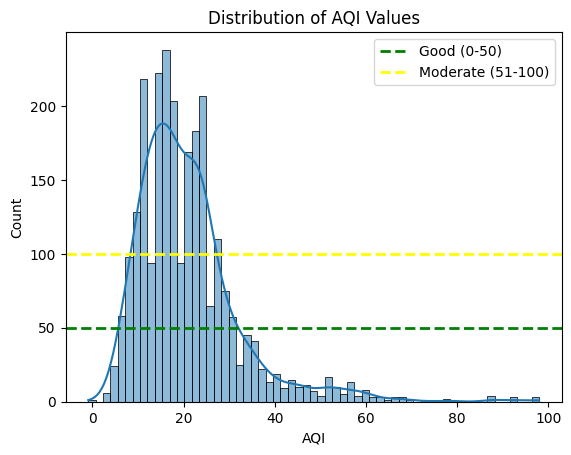

In [621]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of AQI values
sns.histplot(BU2_pm10['AQI'], kde=True)
plt.title('Distribution of AQI Values')
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', linewidth=2, label='Moderate (51-100)')
plt.legend()
plt.show()



1. **Histogram**:
   - The histogram displays the frequency distribution of AQI values.
   - The x-axis represents the AQI values.
   - The y-axis represents the count (frequency) of occurrences for each AQI value.
   - The distribution is heavily skewed to the right, indicating that most AQI values are on the lower end.
   - The blue line overlaid on the histogram is the Kernel Density Estimate (KDE), which provides a smoothed curve representing the probability density function of the AQI values.
   - The peak of the KDE curve aligns with the highest bars in the histogram, around the AQI value of 15-20.

3. **Horizontal Lines**:
   - A green dashed line at y=50, labeled 'Good (0-50)', represents the upper bound of the 'Good' AQI category.
   - A yellow dashed line at y=100, labeled 'Moderate (51-100)', represents the upper bound of the 'Moderate' AQI category.

### Detailed Analysis:

1. **Distribution Characteristics**:
   - **Central Tendency**: The peak of the distribution is around an AQI value of 15-20. This indicates that the majority of AQI readings fall within this range.
   - **Skewness**: The distribution is right-skewed, suggesting that higher AQI values are less common. Most of the AQI values are clustered towards the lower end of the spectrum.
   - **Spread**: While the majority of values are between 0 and 40, there are occasional higher values extending up to around 80-100.

2. **Horizontal Lines Interpretation**:
   - **Good AQI Range (0-50)**: Most of the data points fall within this range, indicating generally good air quality.
   - **Moderate AQI Range (51-100)**: A smaller proportion of the data falls into this range, suggesting that moderate air quality events are less frequent but still present.

### Likely Causes:

1. **Pollution Sources**:
   - **Low AQI Values**: These could be attributed to areas with good air quality management, fewer pollution sources, or favorable weather conditions that disperse pollutants.
   - **High AQI Values**: These spikes could be caused by specific pollution events such as industrial emissions, traffic congestion, construction activities, or unfavorable weather conditions that trap pollutants.

2. **Temporal Variations**:
   - The distribution might reflect daily, weekly, or seasonal patterns. For instance, AQI could be lower during weekends or holidays when industrial and traffic activities are reduced.

3. **Geographical Factors**:
   - The data might be collected from various locations with differing air quality conditions. Urban areas typically show higher AQI values due to denser pollution sources compared to rural areas.

4. **Meteorological Conditions**:
   - Weather conditions such as wind speed, temperature, and precipitation can significantly affect pollutant dispersion and concentration, influencing AQI values.

5. **Data Collection**:
   - The frequency and accuracy of AQI measurements can impact the distribution. Regular and high-resolution monitoring can capture more variability in AQI values.

### Summary:

The histogram and KDE plot indicate that the majority of AQI values fall within the 'Good' category (0-50), with a notable peak around 15-20. The distribution is right-skewed, with fewer occurrences of higher AQI values extending into the 'Moderate' range (51-100). Likely causes for this distribution include the presence and variation of pollution sources, temporal and geographical factors, and meteorological conditions affecting pollutant dispersion.

## AQI Boxplot values by hour

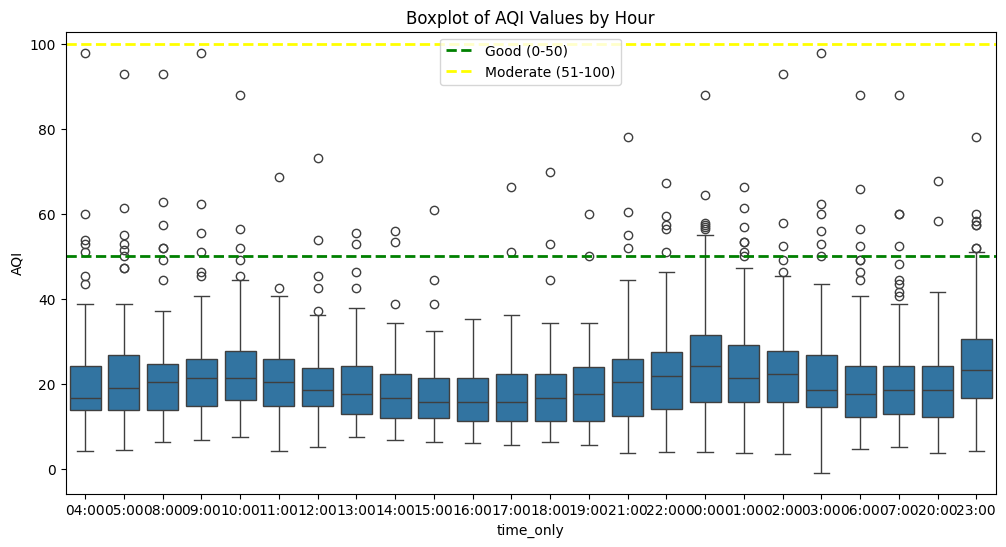

In [622]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6)) 

sns.boxplot(x='time_only', y='AQI', data=BU2_pm10)
plt.title('Boxplot of AQI Values by Hour')
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', linewidth=2, label='Moderate (51-100)')
plt.legend()
plt.show()



## **Overall Distribution**:
   - The AQI values mostly fall within the "Good" (0-50) and "Moderate" (51-100) ranges, as indicated by the dashed lines.
   - There are several outliers above 50, indicating periods with poorer air quality.
## **Hourly Patterns**:
   - The median AQI values remain relatively consistent throughout the day, typically staying below the "Moderate" threshold.
   - There are some hours with higher interquartile ranges, indicating more variability in AQI during those times.
   - The hours with the highest variability seem to be around 8:00, 16:00, and 17:00, as shown by the larger spread of the boxes and more frequent outliers.

## **Outliers**:
   - Several hours have significant outliers, which might correspond to specific events or conditions causing temporary spikes in air pollution.
Given that the location for this AQI data is Bucharest, here are some additional insights and potential considerations:

# Insights:
### **Traffic Patterns**:
   - Bucharest is known for its traffic congestion, especially during rush hours (early morning and late afternoon). This could explain the higher variability in AQI around 8:00 and 17:00.

### **Weather Conditions**:
   - Weather conditions such as wind speed, temperature, and humidity can also impact AQI. For example, lower wind speeds might lead to higher pollutant concentrations, whereas higher wind speeds can help disperse pollutants.

### **Industrial Activities**:
   - If there are industrial areas in or near Bucharest, their operational hours might influence AQI readings. Identifying these hours might help correlate spikes in AQI with industrial activity.



# Regression Statistics

In [623]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

df= BU2

# converting time_only to dt format
df['time_only'] = pd.to_datetime(df['time_only'], format= '%H:%M')
df['date_only'] = pd.to_datetime(df['date_only'], format='%Y-%m-%d')
df['parameter'] = df['parameter'].astype('category')
df.head()
grouped_df = df.groupby('parameter').agg({'value': ['mean', 'sum','max', 'count']}).reset_index()
print(grouped_df)

  parameter       value                        
                   mean       sum     max count
0        co  715.508380  640380.0  2100.0   895
1       no2   14.684328   36916.4   110.0  2514
2      pm10   23.085284   58982.9   150.0  2555
3       so2    5.013871   12614.9    17.0  2516


/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/656767983.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('parameter').agg({'value': ['mean', 'sum','max', 'count']}).reset_index()


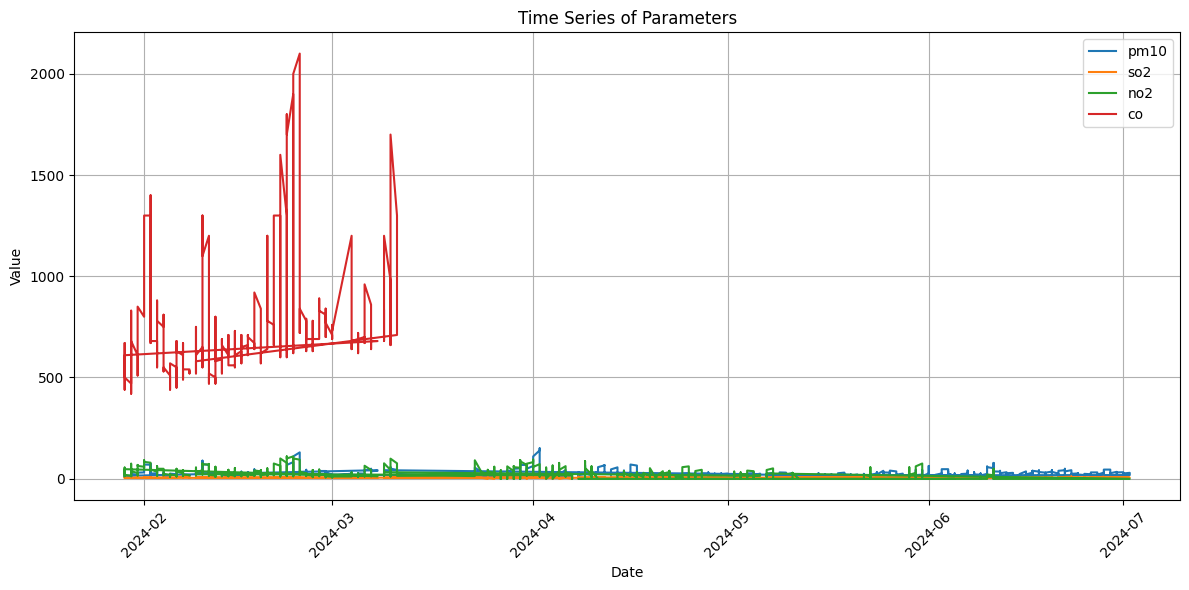

In [624]:
plt.figure(figsize=(12, 6))
for param in df['parameter'].unique():
    subset = df[df['parameter'] == param]
    plt.plot(subset['date_only'], subset['value'], label=param)
plt.title('Time Series of Parameters')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

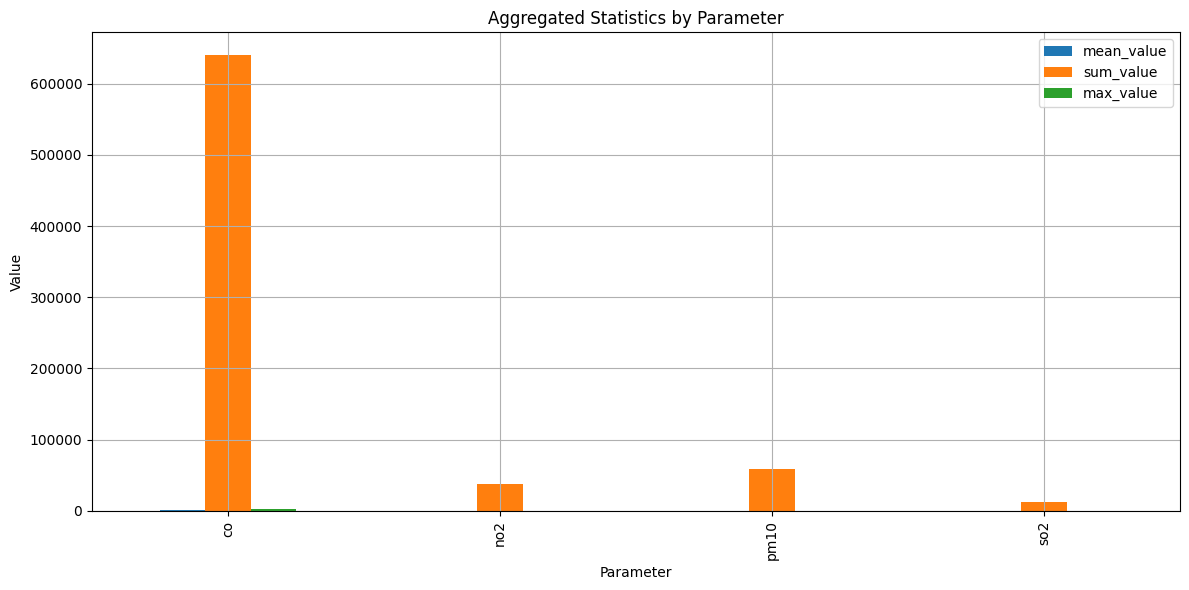

In [625]:
grouped_df.columns = ['parameter', 'mean_value', 'sum_value', 'max_value', 'count_value']

plt.figure(figsize=(12, 6))
grouped_df.plot(kind='bar', x='parameter', y=['mean_value', 'sum_value', 'max_value'], figsize=(12, 6))
plt.title('Aggregated Statistics by Parameter')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

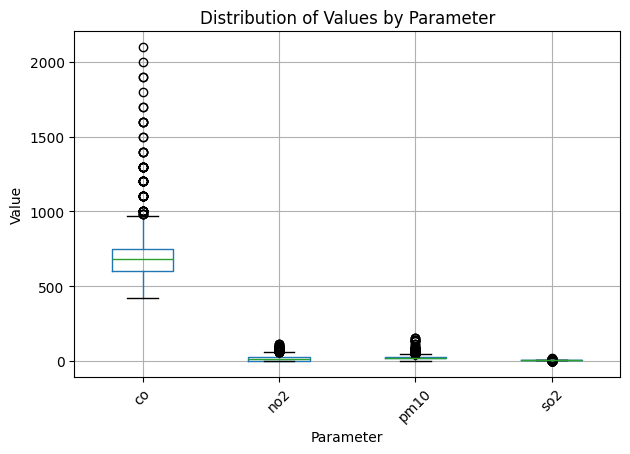

In [626]:
plt.figure(figsize=(12, 6))
df.boxplot(column='value', by='parameter', grid=True)
plt.title('Distribution of Values by Parameter')
plt.suptitle('')
plt.xlabel('Parameter')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


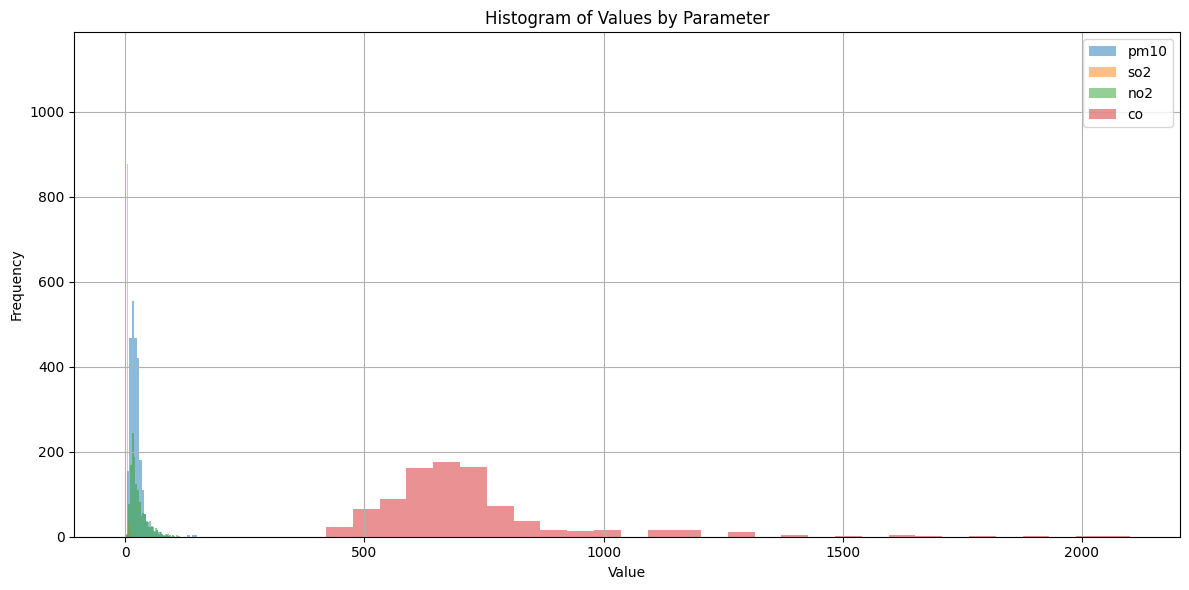

In [627]:
plt.figure(figsize=(12, 6))
for param in df['parameter'].unique():
    subset = df[df['parameter'] == param]
    plt.hist(subset['value'], bins=30, alpha=0.5, label=param)
plt.title('Histogram of Values by Parameter')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1404425615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1404425615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['value_pred'] = model.predict(X)


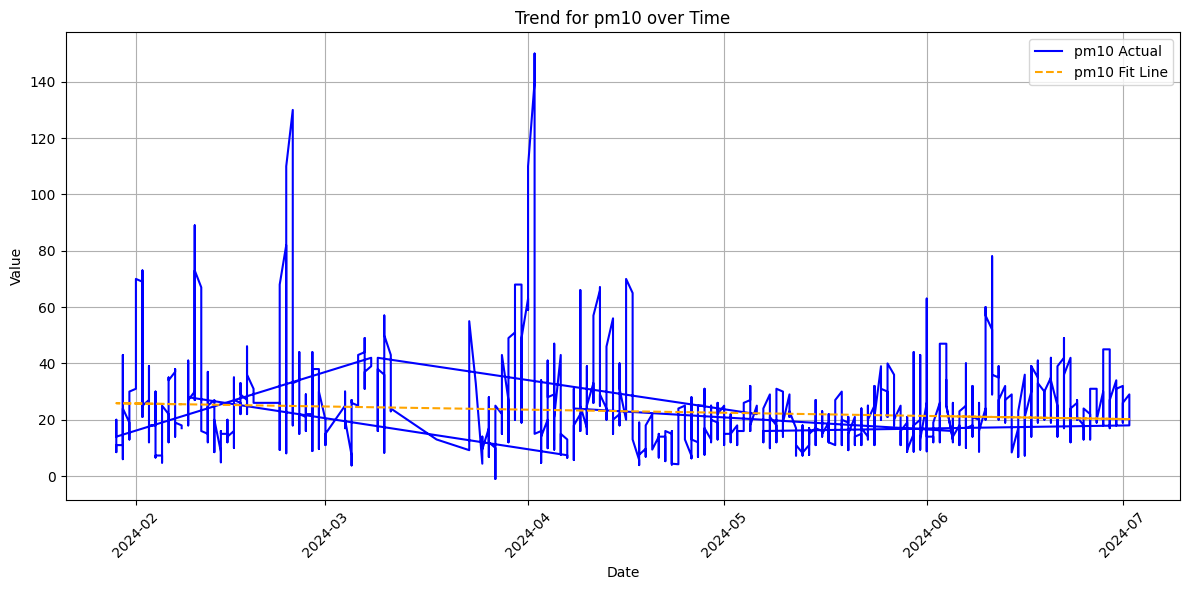

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1404425615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1404425615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['value_pred'] = model.predict(X)


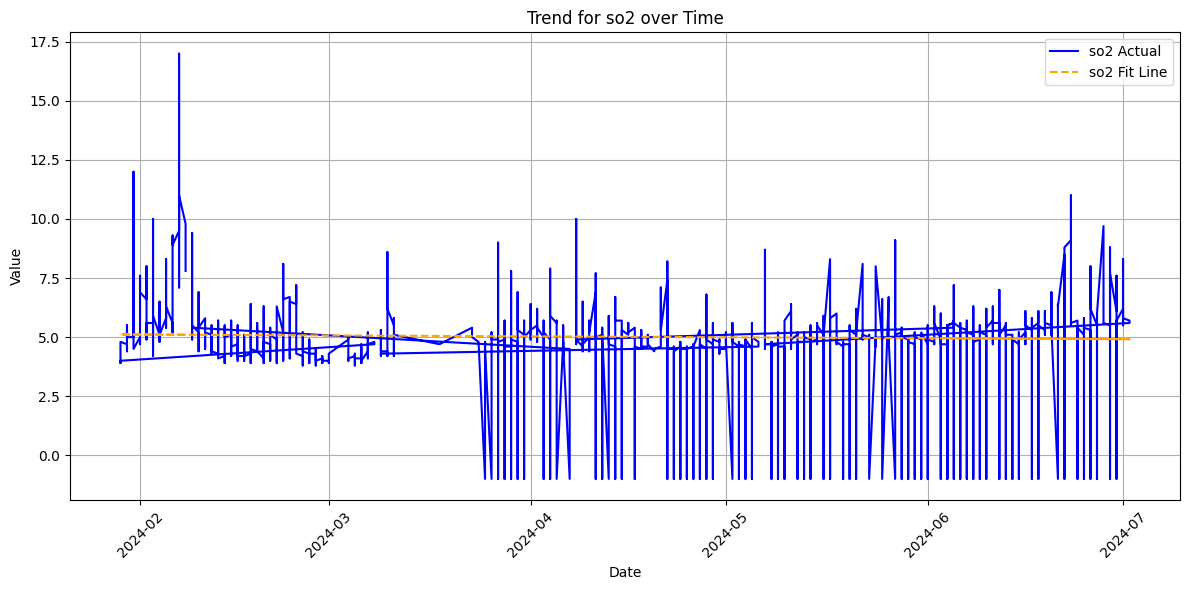

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1404425615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1404425615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['value_pred'] = model.predict(X)


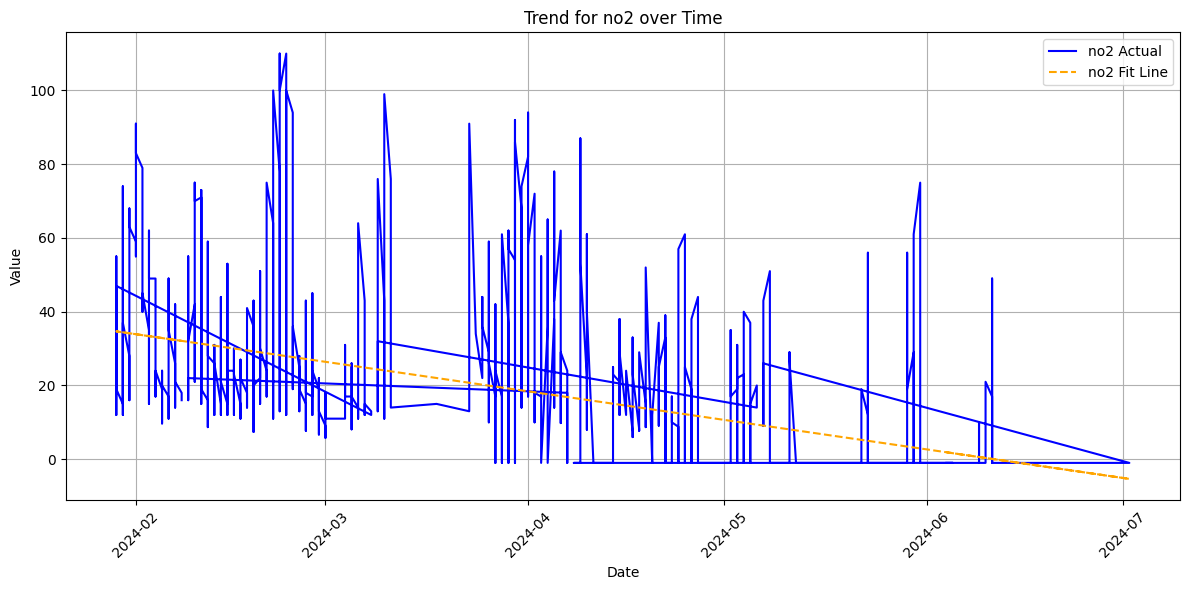

/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1404425615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
/var/folders/my/yxhm_t8s70n8wvc4bps69g3r0000gn/T/ipykernel_2295/1404425615.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['value_pred'] = model.predict(X)


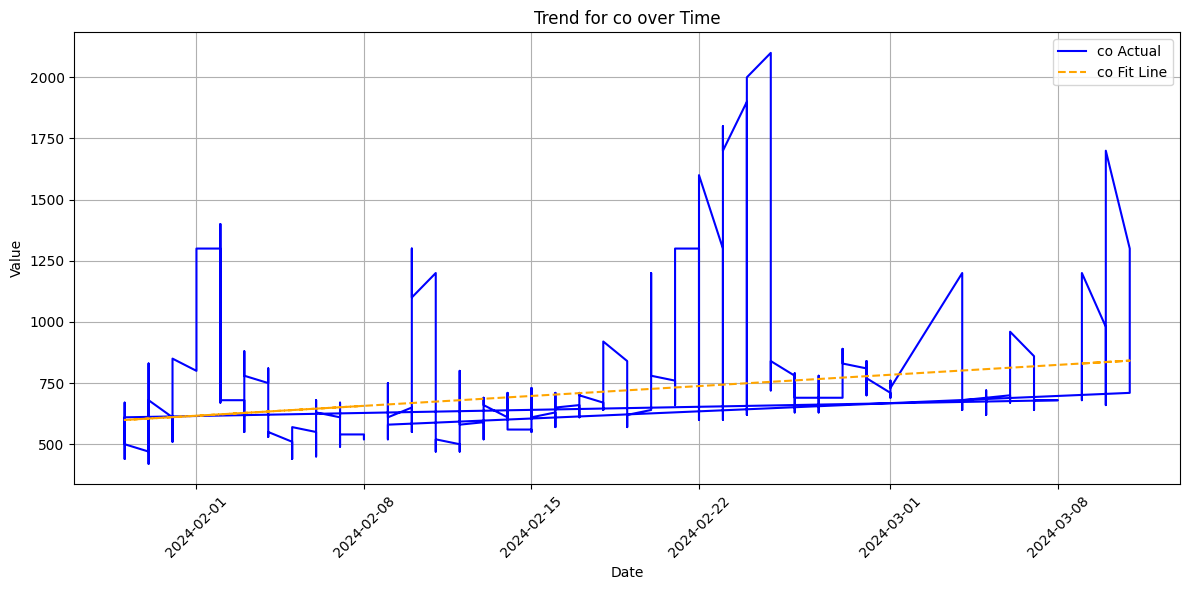

In [628]:
# Using For loop to go through the data and plot individual curves
for param in df['parameter'].unique():
    subset = df[df['parameter'] == param]
    subset['date_ordinal'] = subset['date_only'].map(pd.Timestamp.toordinal)
    
    X = subset[['date_ordinal']]
    y = subset['value']
    
    model = LinearRegression()
    model.fit(X, y)
    subset['value_pred'] = model.predict(X)
    
    plt.figure(figsize=(12, 6))
    plt.plot(subset['date_only'], subset['value'], label=f'{param} Actual', color='blue')
    plt.plot(subset['date_only'], subset['value_pred'], label=f'{param} Fit Line', color='orange', linestyle='--')
    plt.title(f'Trend for {param} over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
